<a href="https://colab.research.google.com/github/sohrab-namazi/Kohonen-MLP-RBF/blob/main/CI992_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kohonen 


In [ ]:
# utils

# import
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time 

# variables 
map_width = 40
map_height = 40
feature_count = 3
sigma = 6
epoch_count = 10
# fixed learning rate
fixed_learning_rate = 0.5
data_count = map_width * map_height 
neuron_count = data_count

# dataset
def create_data(data_count, feature_count):
  return np.random.random((data_count, feature_count)) 

# plot map
def plot_map(rgb_map):
  fig, ax = plt.subplots()
  coll = ax.pcolor(np.zeros((map_width, map_height)))
  coll.set(array=None, facecolors=rgb_map)
  plt.show()

# indexing the map
def build_map(data_count):
  map = []
  width = math.sqrt(data_count)
  y = 0;
  x = 0;
  for i in range(data_count):
    map.append((x, y))
    y += 1;
    if ((i + 1) % width == 0):
      x += 1;
      y = 0;
  return map;

# compute d^2 (i, j) from winner
def compute_distance_squared(neuron1, neuron2, map):
  (x1, y1) = map[neuron1]
  (x2, y2) = map[neuron2]
  return (x1 - x2)**2 + (y1 - y2)**2

In [ ]:
# kohonen : initialization
def init_weights(data_count, feature_count):
  weights = []
  for i in range(data_count):
    data_weights = []
    for i in range(feature_count):
      weight = random.random()
      data_weights.append(weight)
    weights.append(data_weights)
  return weights

In [ ]:
# kohonen : competition
def get_winner(weights, x):
  difference = np.subtract(weights, x)
  squared_difference = np.sum(difference**2, axis=1)
  return np.argmin(squared_difference)

In [ ]:
# kohonen : cooperation
def gaussian_function(winner, map):
  (x, y) = map[winner]
  result = []
  for i in range(neuron_count):
    xx, yy = map[i]
    d_squared = (x - xx)**2 + (y - yy)**2
    result.append(math.exp(-d_squared / (2 * (sigma**2))))
  return result

In [ ]:
# kohonen adaptation
def update_weights(huristic_values, x, weights, data_count, alpha):
  for i in range(data_count):
    weights[i] += alpha * huristic_values[i] * np.subtract(x, weights[i])
  return weights

In [ ]:
# kohonen : run
def run_kohonen(dataset, map, data_count, feature_count, weights, alpha):
  for data in dataset:
    a = time.time()
    winner_neuron = get_winner(weights, data)
    b = time.time()
    huristic_values = gaussian_function(winner_neuron, map)
    c = time.time()
    weights = update_weights(huristic_values, data, weights, data_count, alpha)
    d = time.time()
    scale_factor = np.array(weights).max()
    for i in range(data_count):
     weights[i] = weights[i] / scale_factor
  return weights

In [ ]:
# create dataset & map & init weights
dataset = create_data(data_count, feature_count)
map = build_map(data_count)
weights = init_weights(data_count, feature_count)

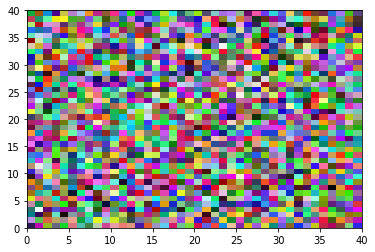

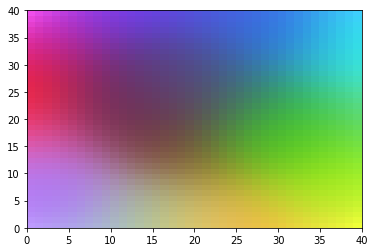

In [ ]:
# main
alpha = fixed_learning_rate
for i in range(epoch_count):
  weights = run_kohonen(dataset, map, data_count, feature_count, weights, alpha)
  scale_factor = np.array(weights).max()
  for j in range(data_count):
    weights[j] = weights[j] / scale_factor

# plot result    
plot_map(dataset)
plot_map(weights)

# Q1.B. Kohonen

In [ ]:
# create dataset & map & init weights
dataset = create_data(data_count, feature_count)
map = build_map(data_count)
weights = init_weights(data_count, feature_count)

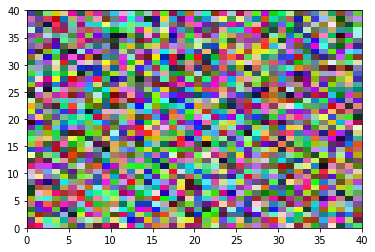

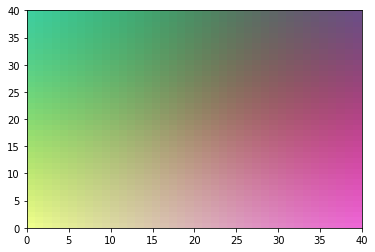

In [ ]:
# main
alpha = 1
sigma = 12
for i in range(epoch_count):
  alpha = (1 / (i + 1))
  weights = run_kohonen(dataset, map, data_count, feature_count, weights, alpha)
  scale_factor = np.array(weights).max()
  for j in range(data_count):
    weights[j] = weights[j] / scale_factor

# plot result    
plot_map(dataset)
plot_map(weights)

In [ ]:
# Q2.C. variant sigma

# create dataset & map & init weights
dataset = create_data(data_count, feature_count)
map = build_map(data_count)
weights = init_weights(data_count, feature_count)

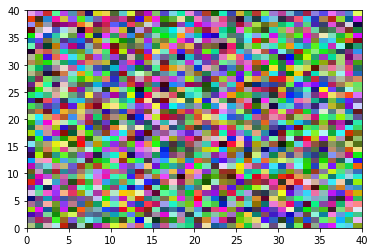

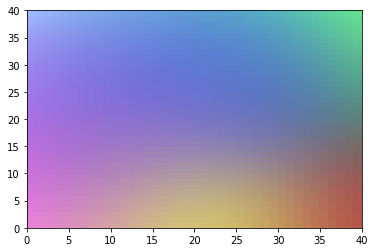

In [ ]:
# main
alpha = 0.5
for i in range(epoch_count):
  sigma = sigma * 0.99
  weights = run_kohonen(dataset, map, data_count, feature_count, weights, alpha)
  scale_factor = np.array(weights).max()
  for j in range(data_count):
    weights[j] = weights[j] / scale_factor

# plot result    
plot_map(dataset)
plot_map(weights)

# MLP

In [ ]:
# import 
import numpy as np
from keras.layers import Dense, Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import math

In [ ]:
# define y = sin(x)
x = np.arange(-5, 5, .1)
y = np.sin(x)

In [ ]:
# define NN model
model = Sequential()
model.add(Dense(10, input_shape=(1,), activation='sigmoid'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mean_squared_error'])
model.fit(x, y, epochs=2000, batch_size=8, verbose=0)
MLP_result = model.predict(x)

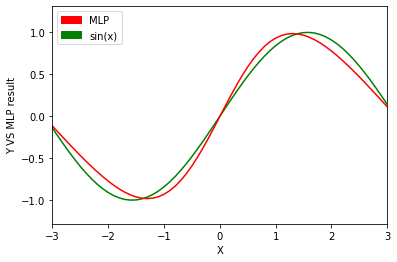

In [ ]:
# plot
fig, ax = plt.subplots()
red_line = mpatches.Patch(color='red', label='MLP')
green_line = mpatches.Patch(color='green', label='sin(x)')
plt.legend(handles=[red_line, green_line])
plt.plot(x, y, 'g', x, MLP_result, 'r')
plt.ylabel('Y VS MLP result')
plt.xlabel('X')
plt.xlim([-3, 3])
plt.show()

# RBF

In [ ]:
# import 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
# utils

# get cluster of one specefic data during clustering
def get_cluster_data(cluster_count, X, clusters):

    # compute distance of each point to each cluster
    distances_to_clusters = []
    for i in range(cluster_count):
        distancesToCluster = np.subtract(X, clusters[i])
        distances_to_clusters.append(abs(distancesToCluster))
    
    # convert horizontal to vertical for getting min in each column
    distances_to_clusters = np.array(distances_to_clusters).T

    # get the cluster of each data
    nearest_cluster_to_points = np.argmin(distances_to_clusters, axis=1)
    return nearest_cluster_to_points

# get points in a cluster
def get_points_in_cluster(data_count, nearest_cluster_to_points, i, X):
  points_in_cluster = []
  for m in range(data_count):
    if (nearest_cluster_to_points[m] == i):
      points_in_cluster.append(X[m])
  return points_in_cluster

# k means clustering for finding the RBF centers
def get_rbf_centers_sigmas(X, cluster_count, data_count):

  # init clusters & sigmas
  clusters = np.random.choice(X, cluster_count)
  last_clusters = clusters.copy()
  sigmas = np.zeros(cluster_count)
  min_change_rate = 1e-6

  while True:
    nearest_cluster_to_points = get_cluster_data(cluster_count, X, clusters)
    for i in range(cluster_count):
      points_in_cluster = get_points_in_cluster(data_count, nearest_cluster_to_points, i, X)
      # update clusters
      if len(points_in_cluster) > 0:
        clusters[i] = np.mean(points_in_cluster)
    if np.linalg.norm(clusters - last_clusters) < min_change_rate:
        break
    else:
        last_clusters = clusters.copy() 

  nearest_cluster_to_points = get_cluster_data(cluster_count, X, clusters)
  empty_clusters = []
  for i in range(cluster_count):
    points_in_cluster = get_points_in_cluster(data_count, nearest_cluster_to_points, i, X)
    if len(points_in_cluster) < 2:
      empty_clusters.append(i)
    else:
      sigmas[i] = np.std(points_in_cluster)

  # set std for sparse clusters  
  if len(empty_clusters) > 0:
    candiadate_points = []
    for i in range(cluster_count):
      if i not in empty_clusters:
        points_in_cluster = get_points_in_cluster(data_count, nearest_cluster_to_points, i, X)
        candiadate_points.extend(points_in_cluster)
    sigmas[empty_clusters] = np.mean(np.std(candiadate_points))

  return (clusters, sigmas)

# radial basis functions
def gaussian_function(x, t, sigma):
  return np.exp((-(x - t) ** 2) / (2 * sigma ** 2)) 

In [ ]:
# train
def train_RBF(X, y, cluster_count, epoch_count, learning_rate, Ts, sigmas):
  # init 
  b = np.random.random()
  W = np.random.randn(cluster_count)
  data_count = len(X)
    
  # training data
  for epoch in range(epoch_count):
    for i in range(data_count):
      rbf_outputs = [gaussian_function(X[i], Ts[j], sigmas[j]) for j in range(cluster_count)]
      F = np.dot(rbf_outputs, W) + b
      error = (y[i] - F) 
      co = learning_rate * error
      W = W + np.multiply(rbf_outputs, co)
      b = b + learning_rate * error
  return W, b  


In [ ]:
# predict function
def predict_RBF(X, data_count, Ts, sigmas, W, b, cluster_count):
  result = []
  for i in range(data_count):
    rbf_outputs = [gaussian_function(X[i], Ts[j], sigmas[j]) for j in range(cluster_count)]
    F = np.dot(rbf_outputs, W) + b
    result.append(F)
  return result

In [ ]:
# run RBF
def run_RBF(X, Y, cluster_count, learning_rate, epoch_count):
  Ts, sigmas = Ts, sigmas = get_rbf_centers_sigmas(X, cluster_count, len(X))
  W, b = train_RBF(X, Y, cluster_count, epoch_count, learning_rate, Ts, sigmas)
  y_predict = predict_RBF(X, len(X), Ts, sigmas, W, b, cluster_count)
  return y_predict

In [ ]:
# main
data_count = 500
epoch_count = 10000
cluster_count = 4
learning_rate = 0.005
train_range = 5. 
X = np.sort(np.random.uniform(-train_range, train_range, data_count), axis=0)
y = np.sin(X) 
RBF_result = run_RBF(X, y, cluster_count, learning_rate, epoch_count)

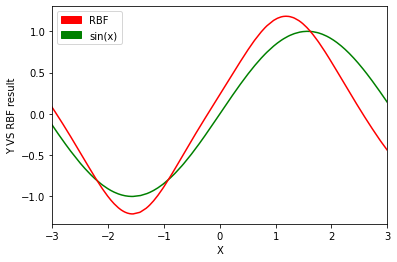

In [ ]:
# plot
fig, ax = plt.subplots()
red_line = mpatches.Patch(color='red', label='RBF')
green_line = mpatches.Patch(color='green', label='sin(x)')
plt.legend(handles=[red_line, green_line])
plt.plot(X, y, 'g', X, RBF_result, 'r')
plt.ylabel('Y VS RBF result')
plt.xlabel('X')
plt.xlim([-3, 3])
plt.show()

# Compare results

Here are the 3 functions, compared together by plotting their corresponding graphs, in each point you can compare them easily by their graphs:



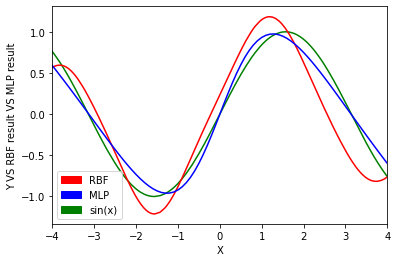

In [ ]:
# plot & compare
fig, ax = plt.subplots()
red_line = mpatches.Patch(color='red', label='RBF')
blue_line = mpatches.Patch(color='blue', label='MLP')
green_line = mpatches.Patch(color='green', label='sin(x)')
plt.legend(handles=[red_line, blue_line, green_line])
plt.plot(X, y, 'g', X, RBF_result, 'r', x, MLP_result, 'b')
plt.ylabel('Y VS RBF result VS MLP result')
plt.xlabel('X')
plt.xlim([-4, 4])
print("Here are the 3 functions, compared together by plotting their corresponding graphs, in each point you can compare them easily by their graphs:\n")
plt.show()